### 데이터 가져오기

In [5]:
file = '../DATA/2023년 연료원별 시간대별 설비용량 및 전력거래량 (1).xlsx'
import pandas as pd

df = pd.read_excel(file, sheet_name='Sheet1', skiprows=5)
print(df.head())

       거래일자  시간  연료원  설비용량(MW)  전력거래량(MWh)
0  20230101   1  원자력     24650       19561
1  20230101   2  원자력     24650       19561
2  20230101   3  원자력     24650       19562
3  20230101   4  원자력     24650       19560
4  20230101   5  원자력     24650       19559


In [ ]:
# %pip install openpyxl

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179208 entries, 0 to 179207
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   거래일자        179208 non-null  int64 
 1   시간          179208 non-null  int64 
 2   연료원         179208 non-null  object
 3   설비용량(MW)    179208 non-null  int64 
 4   전력거래량(MWh)  179208 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 6.8+ MB


### 거래일자 + 시간

In [8]:
# 거래일자 열과 시간 열을 합치기 
# - 시간 단위가 int, 합치면 202301012, 2023010112 이런 식으로 자릿수가 달라짐
# - 시간 단위를 2자리로 맞추기 위해 zfill() 함수 사용
df['거래일자'] = df['거래일자'].astype(str)
df['시간'] = df['시간'].astype(str)
df['날짜시간'] = df['거래일자'] + df['시간'].str.zfill(2)
print(df.head())

       거래일자 시간  연료원  설비용량(MW)  전력거래량(MWh)        날짜시간
0  20230101  1  원자력     24650       19561  2023010101
1  20230101  2  원자력     24650       19561  2023010102
2  20230101  3  원자력     24650       19562  2023010103
3  20230101  4  원자력     24650       19560  2023010104
4  20230101  5  원자력     24650       19559  2023010105


In [11]:
# 날짜 시간 열을 인덱스로 설정
df.set_index('날짜시간', inplace=True)
print(df.head())

                거래일자 시간  연료원  설비용량(MW)  전력거래량(MWh)
날짜시간                                              
2023010101  20230101  1  원자력     24650       19561
2023010102  20230101  2  원자력     24650       19561
2023010103  20230101  3  원자력     24650       19562
2023010104  20230101  4  원자력     24650       19560
2023010105  20230101  5  원자력     24650       19559


In [17]:
# 연료원별 구분, 연료원 열 제외
nuclear_df = df[df['연료원'] == '원자력'].drop(['연료원', '거래일자', '시간'], axis=1)
nuclear_df.head()

,설비용량(MW),전력거래량(MWh)
날짜시간,,
2023010101,24650,19561
2023010102,24650,19561
2023010103,24650,19562
2023010104,24650,19560
2023010105,24650,19559


In [19]:
# 모든 연료원 확인
df['연료원'].unique()

array(['원자력', '유연탄', '무연탄', '바이오가스', '부생가스', '수력', '양수', '매립가스', '중유',
       '태양광', '폐기물', '풍력', 'LNG', '연료전지', '경유', '해양에너지', '바이오매스', 'IGCC',
       '바이오중유', '기타', '바이오SRF'], dtype=object)

### 자료가 가격과 거리가 멀어 새로운 자료 찾음

In [5]:
import pandas as pd

file = '../DATA/HOME_전력거래_계통한계가격_가중평균SMP.csv'

df = pd.read_csv(file, encoding='cp949', skiprows=1)
df.head()

,Unnamed: 0,육지,제주,통합,Unnamed: 4
0,2024/03,134.40,140.61,134.47,0.0
1,2024/02,119.49,122.34,119.53,0.0
2,2024/01,137.91,150.67,138.06,0.0
3,2023/12,131.05,137.04,131.12,0.0
4,2023/11,120.82,123.37,120.85,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  276 non-null    object 
 1   육지          276 non-null    float64
 2   제주          276 non-null    float64
 3   통합          276 non-null    float64
 4   Unnamed: 4  276 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.9+ KB


In [8]:
# 첫 열을 인덱스로 설정, 육지, 제주, 통합을 시각화
df.set_index('Unnamed: 0', inplace=True)
df.head()

,육지,제주,통합,Unnamed: 4
Unnamed: 0,,,,
2024/03,134.40,140.61,134.47,0.0
2024/02,119.49,122.34,119.53,0.0
2024/01,137.91,150.67,138.06,0.0
2023/12,131.05,137.04,131.12,0.0
2023/11,120.82,123.37,120.85,0.0


In [13]:
# 넷 째 열 = BLMP
df.columns = ['육지', '제주', '통합', 'BLMP']
df.head()

,육지,제주,통합,BLMP
Unnamed: 0,,,,
2024/03,134.40,140.61,134.47,0.0
2024/02,119.49,122.34,119.53,0.0
2024/01,137.91,150.67,138.06,0.0
2023/12,131.05,137.04,131.12,0.0
2023/11,120.82,123.37,120.85,0.0


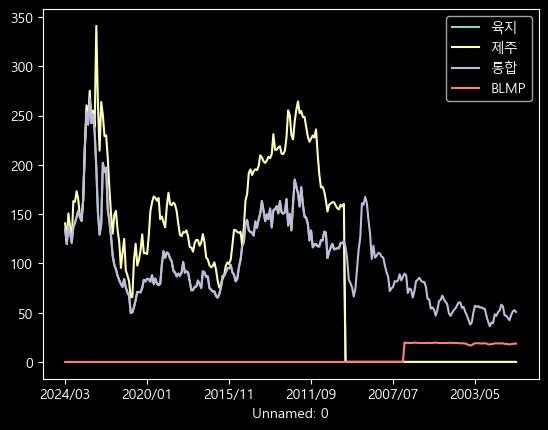

In [14]:
# 시각화
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
df.plot()
plt.show()

=> 계통가격은 육지보다 제주가 높고 2015년 감소했다 21년도부터 다시 증가, 최근 감소하는 추세이다.